# Project: Car Price Prediction

In [253]:
import pandas as pd
import numpy as np

## Initial data cleaning with raw data

In [254]:
df = pd.read_csv('auto24_cars_raw.csv')

In [255]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset has 15612 rows and 12 columns

Column names:
['url', 'brand', 'first_reg', 'type', 'body_type', 'engine', 'fuel', 'mileage', 'drive_type', 'gearbox', 'color', 'price']

First 5 rows:
                                      url                   brand  first_reg  \
0  https://www.auto24.ee/soidukid/4098580     Toyota Land Cruiser     1992.0   
1  https://www.auto24.ee/soidukid/4095518              Opel Corsa     2008.0   
2  https://www.auto24.ee/soidukid/4241916               Saab 9000     1992.0   
3  https://www.auto24.ee/soidukid/4215960  Fiat Albea Comfort LPG     2008.0   
4  https://www.auto24.ee/soidukid/4239545              Ford Focus     2007.0   

        type   body_type     engine                            fuel   mileage  \
0    maastur  universaal  4.2 123kW                          diisel  464000.0   
1  sõiduauto    luukpära   1.2 59kW                         bensiin  180000.0   
2  sõiduauto    luukpära  2.3 110kW                         bensiin  305698.0   
3  s

In [256]:
# Before removing duplicates
print(f"Original rows: {len(df)}")

# Remove duplicates
df = df.drop_duplicates(subset=['url'])

# After removing duplicates
print(f"Rows after removing duplicates: {len(df)}")

Original rows: 15612
Rows after removing duplicates: 14767


In [257]:
# Before removing
print(f"Original rows: {len(df)}")

# Remove rows with any missing values
df = df.dropna()

# After removing
print(f"Rows after removing missing values: {len(df)}")

Original rows: 14767
Rows after removing missing values: 13826


In [258]:
#Translate
df['type'] = df['type'].replace('maastur', 'suv')
df['type'] = df['type'].replace('sõiduauto', 'passenger')


In [259]:
# Split by whitespace and take the first word
df['body_type'] = df['body_type'].str.split().str[0]

In [260]:
df['body_type'] = df['body_type'].replace('sedaan', 'sedan')
df['body_type'] = df['body_type'].replace('universaal', 'touring')
df['body_type'] = df['body_type'].replace('luukpära', 'hatchback')
df['body_type'] = df['body_type'].replace('mahtuniversaal', 'minivan')
df['body_type'] = df['body_type'].replace('kabriolett', 'cabriolet')
df['body_type'] = df['body_type'].replace('pikap', 'pickup')
df['body_type'] = df['body_type'].replace('kupee', 'coupe')
df['body_type'] = df['body_type'].replace('lahtine', 'open')
df['body_type'] = df['body_type'].replace('limusiin', 'limousine')

In [261]:
df['fuel'] = df['fuel'].replace('bensiin + gaas (LPG/vedelgaas)', 'bensiin + gaas')
df['fuel'] = df['fuel'].replace('bensiin + gaas (CNG/surugaas)', 'bensiin + gaas')
df['fuel'] = df['fuel'].replace('hübriid (bensiin / elekter)', 'hübriid')
df['fuel'] = df['fuel'].replace('hübriid (diisel / elekter)', 'hübriid')
df['fuel'] = df['fuel'].replace('gaas (CNG/surugaas)', 'gaas')
df['fuel'] = df['fuel'].replace('gaas (LPG/vedelgaas)', 'gaas')
df['fuel'] = df['fuel'].replace('pistikhübriid (diisel / elekter)', 'pistikhübriid')
df['fuel'] = df['fuel'].replace('pistikhübriid (bensiin / elekter)', 'pistikhübriid')

In [262]:
df['fuel'] = df['fuel'].replace('diisel', 'diesel')
df['fuel'] = df['fuel'].replace('bensiin', 'petrol')
df['fuel'] = df['fuel'].replace('bensiin + gaas', 'petrol + gas')
df['fuel'] = df['fuel'].replace('hübriid', 'hybrid')
df['fuel'] = df['fuel'].replace('elekter', 'electric')
df['fuel'] = df['fuel'].replace('gaas', 'gas')
df['fuel'] = df['fuel'].replace('pistikhübriid', 'plug-in hybrid')
df['fuel'] = df['fuel'].replace('vesinik', 'hydrogen')
df['fuel'] = df['fuel'].replace('etanool', 'ethanol')

In [263]:
df['drive_type'] = df['drive_type'].replace('nelikvedu', 'four-wheel drive')
df['drive_type'] = df['drive_type'].replace('esivedu', 'front-wheel drive')
df['drive_type'] = df['drive_type'].replace('tagavedu', 'rear-wheel drive')

In [264]:
df['gearbox'] = df['gearbox'].str.split().str[0]

In [265]:
# Remove rows where gearbox equals '(Konstantne'
df = df[df['gearbox'] != '(konstantne']
df = df[df['gearbox'] != '(Konstantne']

In [266]:
df['gearbox'] = df['gearbox'].replace({
    'automaat': 'automatic',
    'manuaal': 'manual',
    'poolautomaat': 'semi-automatic'
})

In [267]:
df['color'] = df['color'].str.split().str[0]

In [268]:
# Create translation dictionary
color_translation = {
    'punane': 'red',
    'must': 'black',
    'valge': 'white',
    'helesinine': 'light blue',
    'hõbedane': 'silver',
    'roheline': 'green',
    'heleroheline': 'light green',
    'hall': 'gray',
    'tumehall': 'dark gray',
    'beež': 'beige',
    'sinine': 'blue',
    'lilla': 'purple',
    'pruun': 'brown',
    'tumepunane': 'dark red',
    'oranž': 'orange',
    'helehall': 'light gray',
    'tumesinine': 'dark blue',
    'tumeroheline': 'dark green',
    'helebeež': 'light beige',
    'kollane': 'yellow',
    'kuldne': 'gold',
    'helepruun': 'light brown',
    'tumepruun': 'dark brown',
    'tumeoranž': 'dark orange',
    'helekollane': 'light yellow',
    'tumelilla': 'dark purple',
    'tumebeež': 'dark beige',
    'roosa': 'pink',
    'Gold': 'gold',
    'helepunane': 'light red',
    'Bentayga': 'Bentayga',  # Model name, not a color
    'Rose': 'rose'
}

# Replace values
df['color'] = df['color'].replace(color_translation)

In [269]:
df = df[df['color'] != 'Bentayga']

In [270]:
# Count spaces in brand column
space_count = df['brand'].str.count(' ')

# Create model column
df['model'] = None

# Only split where there's exactly 1 space (2 words)
mask = space_count == 1

# Split and assign for rows with exactly 1 space
df.loc[mask, 'model'] = df.loc[mask, 'brand'].str.split(' ').str[1]
df.loc[mask, 'brand'] = df.loc[mask, 'brand'].str.split(' ').str[0]

In [271]:
# Get the column index of 'brand'
brand_index = df.columns.get_loc('brand')

# Reorder columns - insert model right after brand
cols = df.columns.tolist()
cols.remove('model')
cols.insert(brand_index + 1, 'model')
df = df[cols]

In [272]:
df['brand'].unique()

array(['Toyota Land Cruiser', 'Opel', 'Saab', ..., 'Ferrari SF90 Spider',
       'Lamborghini Aventador Ultimae 1/350',
       'BMW 750 Ld M-Packet XDrive'], dtype=object)

In [273]:
df = df[df['brand'] != 'Land']
df = df[df['brand'] != 'MCC']

In [274]:
# Create mask for rows containing 'Land Rover'
land_rover_mask = df['brand'].str.contains('Land Rover', na=False)

# For Land Rover rows, extract everything after 'Land Rover'
df.loc[land_rover_mask, 'model'] = df.loc[land_rover_mask, 'brand'].str.replace('Land Rover', '', n=1).str.strip()

# Set brand to 'Land Rover' for those rows
df.loc[land_rover_mask, 'brand'] = 'Land Rover'

In [275]:
alfa_romeo_mask = df['brand'].str.contains('Alfa Romeo', na=False)

df.loc[alfa_romeo_mask, 'model'] = df.loc[alfa_romeo_mask, 'brand'].str.replace('Alfa Romeo', '', n=1).str.strip()

df.loc[alfa_romeo_mask, 'brand'] = 'Alfa Romeo'

In [276]:
aston_martin_mask = df['brand'].str.contains('Aston Martin', na=False)

df.loc[aston_martin_mask, 'model'] = df.loc[aston_martin_mask, 'brand'].str.replace('Aston Martin', '', n=1).str.strip()

df.loc[aston_martin_mask, 'brand'] = 'Aston Martin'

In [277]:
# Create mask for rows with at least 2 spaces
mask = df['brand'].str.count(' ') >= 2

# For these rows, split on first space only
# First word goes to brand, everything else to model
df.loc[mask, 'model'] = df.loc[mask, 'brand'].str.split(' ', n=1).str[1]
df.loc[mask, 'brand'] = df.loc[mask, 'brand'].str.split(' ', n=1).str[0]

In [278]:
# Count occurrences of each brand
brand_counts = df['brand'].value_counts()

# Get brands that appear more than once
brands_to_keep = brand_counts[brand_counts > 10].index

# Keep only rows with brands that appear more than once
df = df[df['brand'].isin(brands_to_keep)]

In [279]:
# Create mask for models with more than 2 words (at least 2 spaces)
mask = df['model'].str.count(' ') >= 2

# Keep only first 2 words for those rows
df.loc[mask, 'model'] = df.loc[mask, 'model'].str.split(' ', n=2).str[:2].str.join(' ')

In [280]:
df['model'] = df['model'].apply(
    lambda x: x if pd.isna(x) or 'Land Cruiser' in str(x) else str(x).split()[0]
)

In [281]:
model_counts = df['model'].value_counts()

models_to_keep = model_counts[model_counts > 10].index

df = df[df['model'].isin(models_to_keep)]

In [282]:
df['engine_size'] = df['engine'].str.extract(r'^([\d.]+)')[0]
df['power'] = df['engine'].str.extract(r'(\d+kW)')[0]
df['power'] = df['power'].str.replace('kW', '')
df.drop('engine', axis=1, inplace=True)

In [283]:
df.head()

,url,brand,model,first_reg,type,body_type,fuel,mileage,drive_type,gearbox,color,price,engine_size,power
0,https://www.auto24.ee/soidukid/4098580,Toyota,Land Cruiser,1992.0,suv,touring,diesel,464000.0,four-wheel drive,manual,red,19.0,4.2,123
1,https://www.auto24.ee/soidukid/4095518,Opel,Corsa,2008.0,passenger,hatchback,petrol,180000.0,front-wheel drive,automatic,black,300.0,1.2,59
4,https://www.auto24.ee/soidukid/4239545,Ford,Focus,2007.0,passenger,touring,diesel,287000.0,front-wheel drive,manual,silver,399.0,1.8,85
5,https://www.auto24.ee/soidukid/4197828,Honda,Accord,2008.0,passenger,minivan,petrol,402000.0,front-wheel drive,manual,silver,399.0,2.0,114
7,https://www.auto24.ee/soidukid/4204313,Renault,Scenic,2001.0,passenger,hatchback,petrol,222000.0,front-wheel drive,manual,light green,399.0,1.4,70


## Exploratory Data Analysis (EDA)

In [284]:
print(f"Dataset shape at this point: {df.shape}")

Dataset shape at this point: (11934, 14)


In [285]:
# how many unique values for each column?
df.nunique()

url            11934
brand             41
model            247
first_reg         49
type               2
body_type          9
fuel               7
mileage         5432
drive_type         3
gearbox            3
color             30
price           1894
engine_size      198
power            295
dtype: int64

In [286]:
# Drop rows containing null
df = df.dropna(subset=['engine_size', 'power']).reset_index(drop=True)
missing_after = df[['engine_size', 'power']].isna().sum()
print("Shape after dropping:", {df.shape})

Shape after dropping: {(11845, 14)}


In [287]:
# --- 2. Remove unrealistic prices ---
df = df[df['price'] >= 300]   # Drop cars below 300 €
print("Remaining cars:", len(df))

Remaining cars: 11843


In [288]:
# --- 3. Identify categorical and numeric columns ---
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nCategorical columns:", cat_cols)
print("Numeric columns:", num_cols)


Categorical columns: ['url', 'brand', 'model', 'type', 'body_type', 'fuel', 'drive_type', 'gearbox', 'color', 'engine_size', 'power']
Numeric columns: ['first_reg', 'mileage', 'price']


In [289]:
print("\nUnique counts per column:")
print(df.nunique())


Unique counts per column:
url            11843
brand             41
model            247
first_reg         48
type               2
body_type          9
fuel               7
mileage         5390
drive_type         3
gearbox            3
color             30
price           1884
engine_size      197
power            295
dtype: int64


In [290]:
# Convert engine_size and power to numeric
for col in ['engine_size', 'power']:
    df[col] = (
        df[col]
        .astype(str)                     # ensure string format
        .str.replace(',', '.', regex=False)  # convert commas to dots if present
        .str.extract(r'(\d+\.?\d*)')[0]      # extract numeric part
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float, NaN if invalid

# Check conversion results
print(df[['engine_size', 'power']].dtypes)
print(df[['engine_size', 'power']].head(10))


engine_size    float64
power            int64
dtype: object
    engine_size  power
1           1.2     59
2           1.8     85
3           2.0    114
4           1.4     70
5           1.4     66
6           2.0    136
7           1.6     75
8           2.4    108
9           1.8    103
10          1.6     91


In [291]:
# --- 1. Handle 'model' grouping by average price ---
group_size = 5
model_price = df.groupby('model')['price'].mean().sort_values(ascending=False)
model_groups = {model: i // group_size for i, model in enumerate(model_price.index)}
df['model_group'] = df['model'].map(model_groups)
df = df.drop(columns=['model'])

In [292]:
# --- 2. Handle rare colors (group uncommon colors as 'other') ---
color_counts = df['color'].value_counts()
rare_colors = color_counts[color_counts < 50].index
df['color'] = df['color'].replace(rare_colors, 'other')


In [293]:
# let's make first_reg from float to int
df['first_reg'] = df['first_reg'].astype(int)


In [294]:
print(f"Rows before outlier removal: {len(df)}")

price_lower = df['price'].quantile(0.01)
price_upper = df['price'].quantile(0.99)
df = df[(df['price'] >= price_lower) & (df['price'] <= price_upper)]

mileage_lower = df['mileage'].quantile(0.01)
mileage_upper = df['mileage'].quantile(0.99)
df = df[(df['mileage'] >= mileage_lower) & (df['mileage'] <= mileage_upper)]

print(f"Rows after outlier removal: {len(df)}")

Rows before outlier removal: 11843
Rows after outlier removal: 11403


In [295]:
from datetime import date

# right now we have first_reg as first_registration date, but for our analysis, we would need the age of the car
df['age'] = date.today().year - df['first_reg']
df.drop(columns=['first_reg'])

,url,brand,type,body_type,fuel,mileage,drive_type,gearbox,color,price,engine_size,power,model_group,age
111,https://www.auto24.ee/soidukid/4243682,Honda,passenger,sedan,diesel,356000.0,front-wheel drive,manual,dark gray,1000.0,2.2,103,48,19
112,https://www.auto24.ee/soidukid/4241103,Jeep,suv,touring,diesel,350000.0,four-wheel drive,manual,green,1000.0,2.5,85,35,28
113,https://www.auto24.ee/soidukid/4250614,Opel,passenger,minivan,petrol + gas,213500.0,front-wheel drive,manual,gray,1000.0,1.6,69,38,17
114,https://www.auto24.ee/soidukid/4040436,Saab,passenger,touring,petrol,294661.0,front-wheel drive,automatic,other,1000.0,3.0,147,49,25
115,https://www.auto24.ee/soidukid/4232253,Skoda,passenger,hatchback,petrol,135500.0,front-wheel drive,manual,other,1000.0,1.2,47,41,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11720,https://www.auto24.ee/soidukid/4204006,Porsche,passenger,touring,petrol,46900.0,four-wheel drive,automatic,gray,114900.0,3.0,260,3,2
11721,https://www.auto24.ee/soidukid/4155302,Bentley,passenger,touring,petrol,29000.0,four-wheel drive,automatic,red,114990.0,4.0,404,0,6
11722,https://www.auto24.ee/soidukid/4171752,Porsche,passenger,hatchback,electric,2400.0,four-wheel drive,automatic,black,115000.0,420.0,420,1,1
11723,https://www.auto24.ee/soidukid/4148554,Audi,passenger,hatchback,hybrid,43200.0,four-wheel drive,automatic,black,115900.0,4.0,441,2,2


In [296]:
df['power_per_engine'] = df['power'] / df['engine_size']
# Replace inf values (resulting from division by zero) with NaN
df['power_per_engine'] = df['power_per_engine'].replace([np.inf, -np.inf], np.nan)
# Fill any NaN values (including those from inf replacement) with the mean of the column
df['power_per_engine'] = df['power_per_engine'].fillna(df['power_per_engine'].mean())

df['age_mileage_interaction'] = df['age'] * df['mileage']

df['mileage_per_year'] = df['mileage'] / df['age']
# Replace inf values (resulting from division by zero, e.g., age=0) with NaN
df['mileage_per_year'] = df['mileage_per_year'].replace([np.inf, -np.inf], np.nan)
# Fill any NaN values (including those from inf replacement) with the mean of the column
df['mileage_per_year'] = df['mileage_per_year'].fillna(df['mileage_per_year'].mean())

print("New features 'power_per_engine', 'age_mileage_interaction', and 'mileage_per_year' created.")
print(df[['power_per_engine', 'age_mileage_interaction', 'mileage_per_year']].head())


New features 'power_per_engine', 'age_mileage_interaction', and 'mileage_per_year' created.
     power_per_engine  age_mileage_interaction  mileage_per_year
111         46.818182                6764000.0      18736.842105
112         34.000000                9800000.0      12500.000000
113         43.125000                3629500.0      12558.823529
114         49.000000                7366525.0      11786.440000
115         39.166667                2574500.0       7131.578947


In [297]:
# --- 3. Identify categorical and numeric columns ---
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nCategorical columns:", cat_cols)
print("Numeric columns:", num_cols)


Categorical columns: ['url', 'brand', 'type', 'body_type', 'fuel', 'drive_type', 'gearbox', 'color']
Numeric columns: ['first_reg', 'mileage', 'price', 'engine_size', 'power', 'model_group', 'age', 'power_per_engine', 'age_mileage_interaction', 'mileage_per_year']


first_reg
Skew value: -1.09


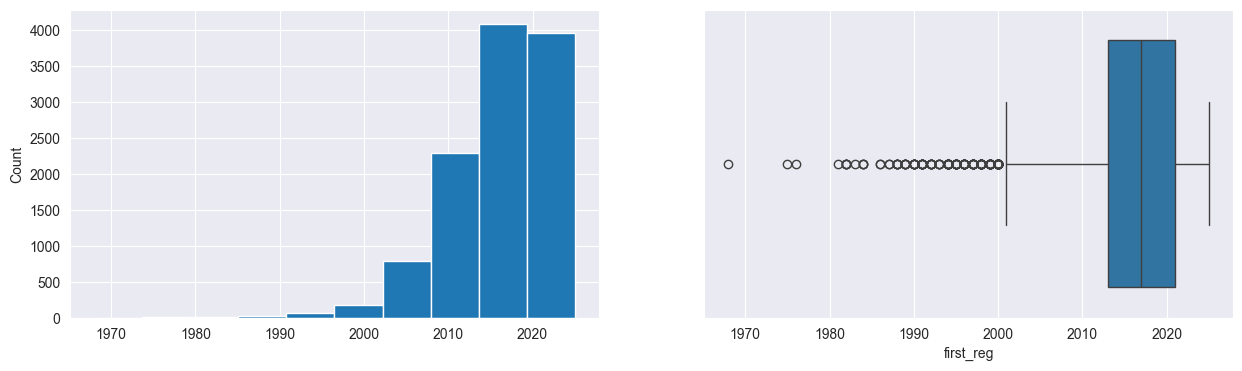

mileage
Skew value: 0.32


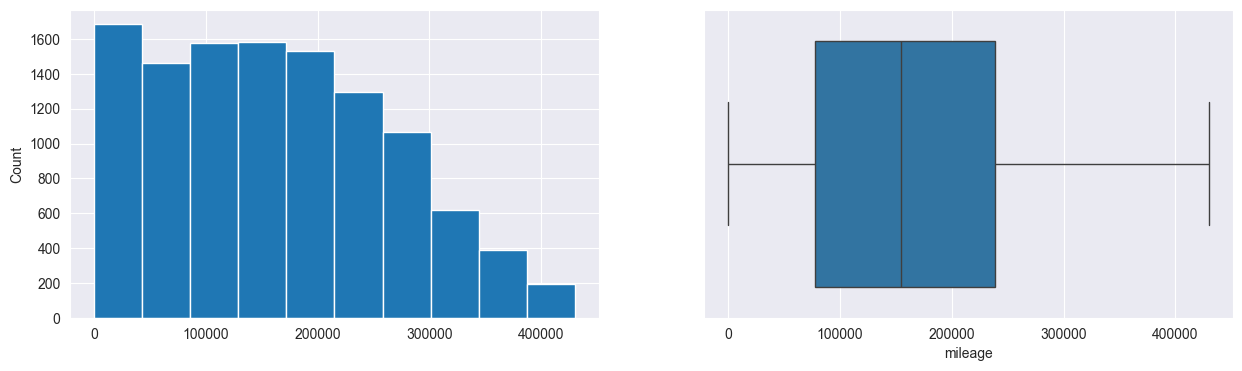

price
Skew value: 1.63


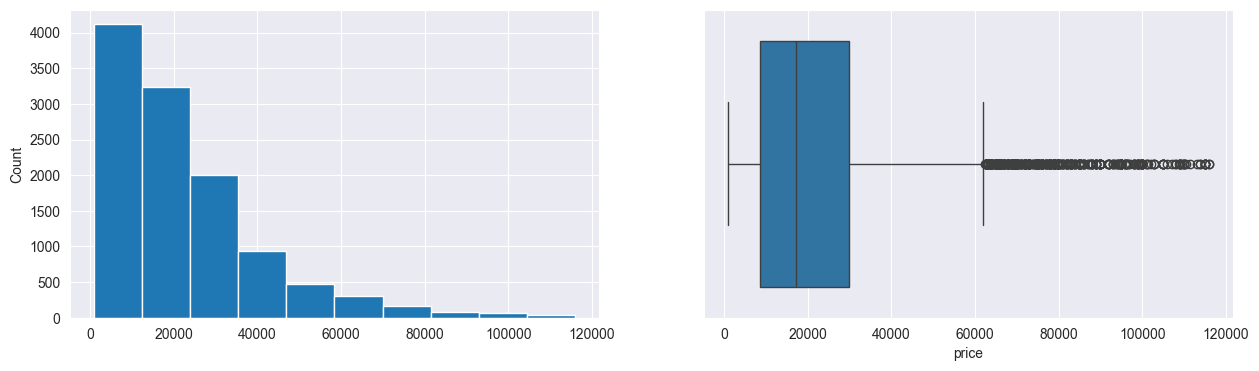

engine_size
Skew value: 11.03


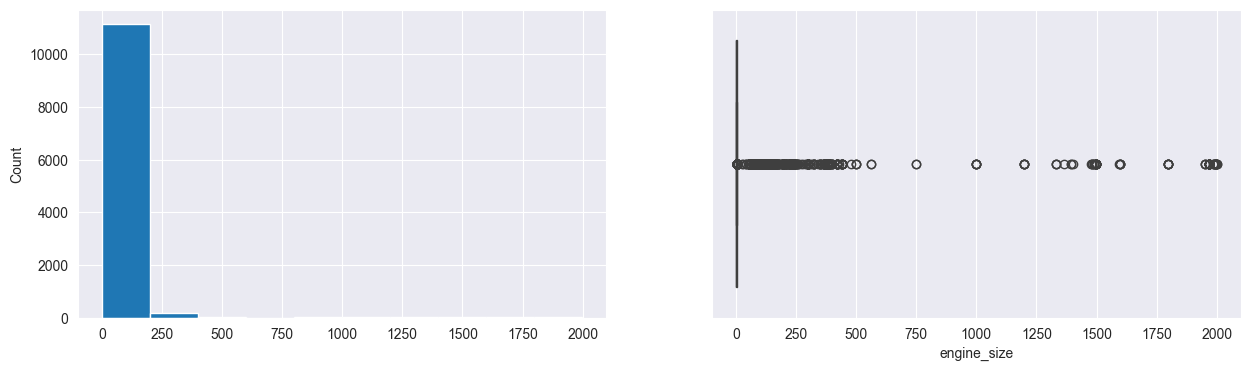

power
Skew value: 1.8


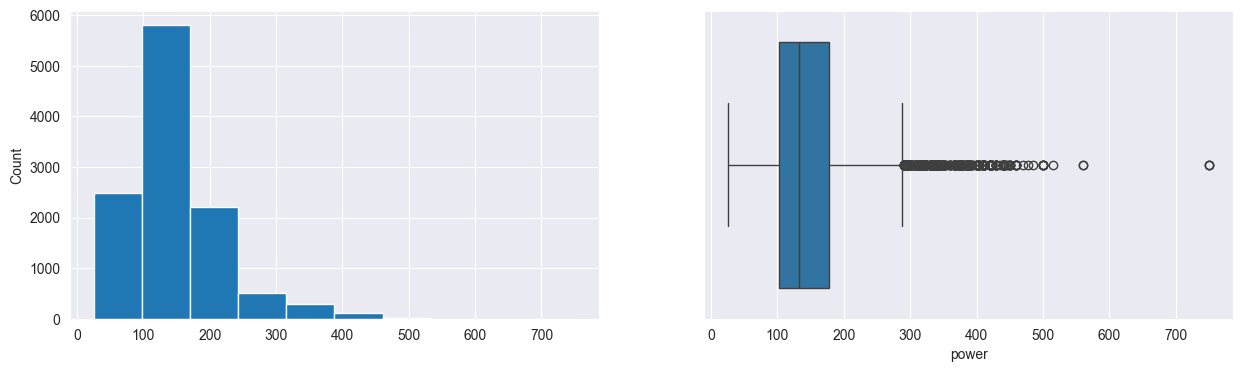

model_group
Skew value: 0.03


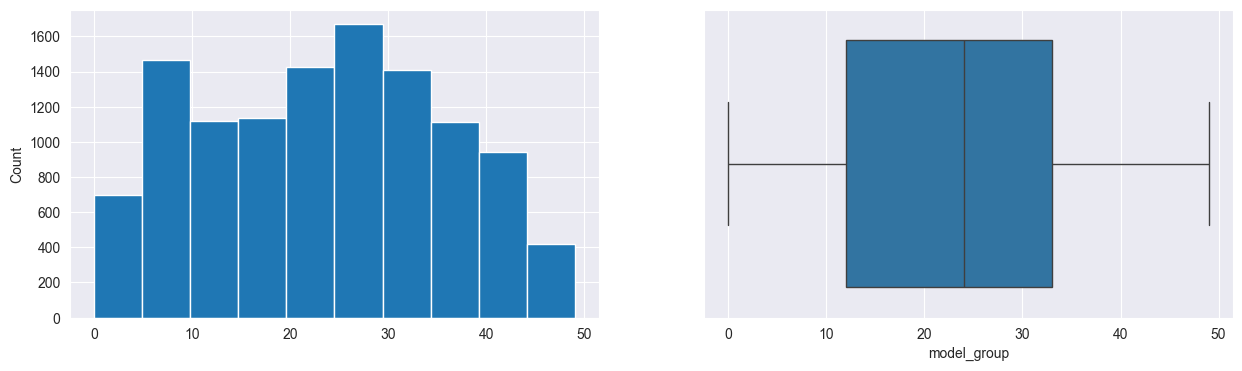

age
Skew value: 1.09


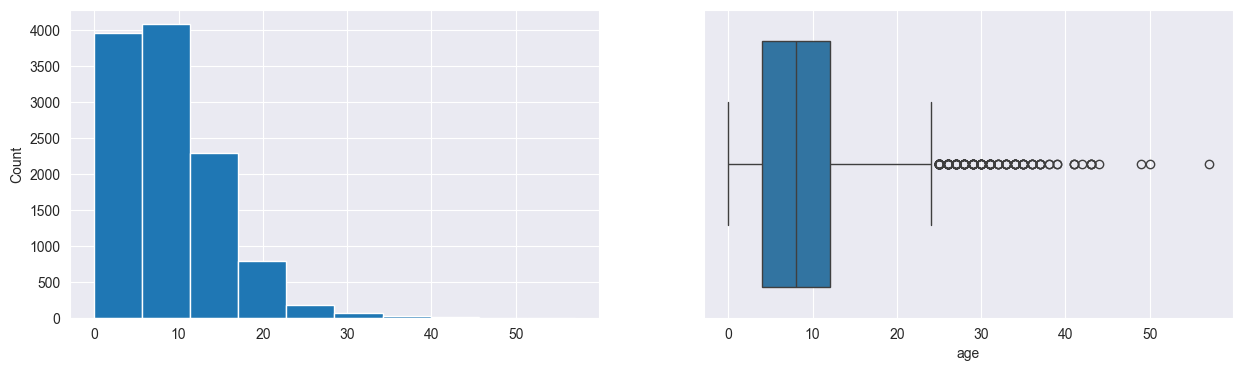

power_per_engine
Skew value: -0.07


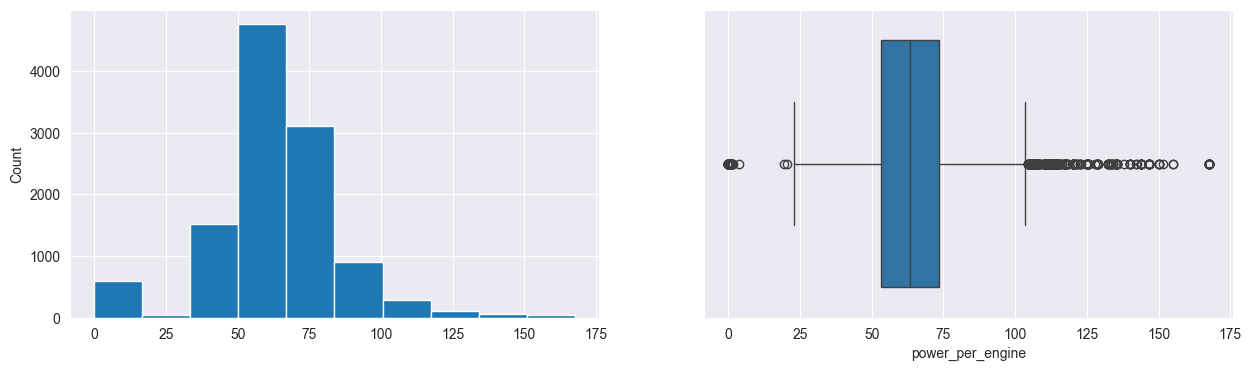

age_mileage_interaction
Skew value: 1.5


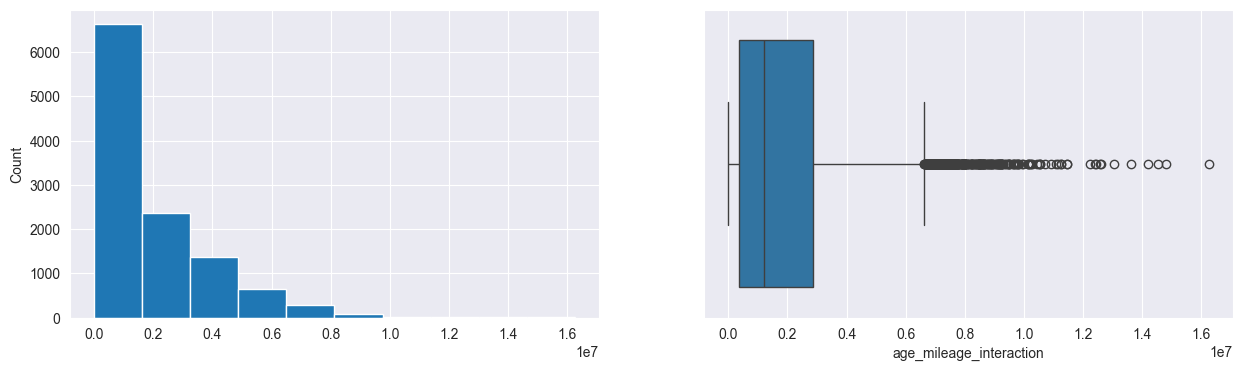

mileage_per_year
Skew value: 1.43


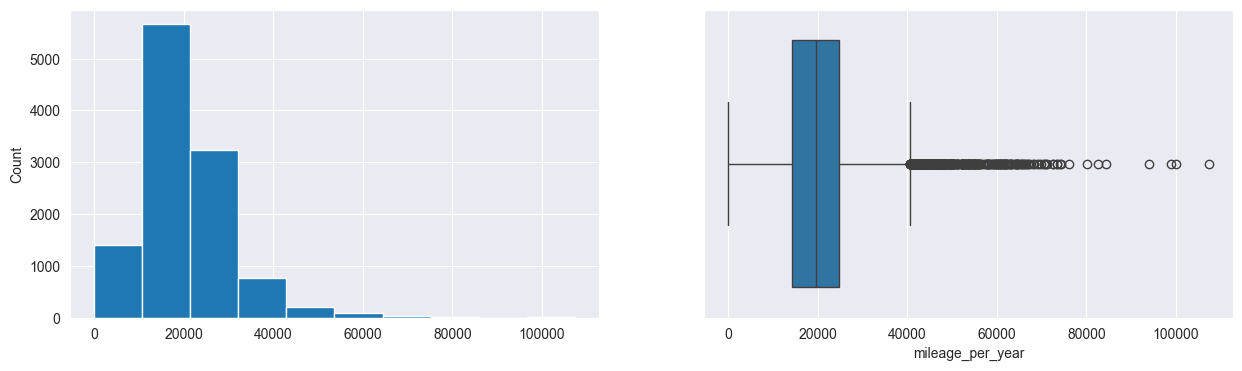

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    print(col)
    print('Skew value:', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [299]:
# we apply transformation to skewed num columns. Trying to transform data. These transformations compress
# the larger values and spread out the smaller values, making the distribution more symmetrical and closer to normal.

# Ensure all values are positive before log transformation
df.loc[df['mileage'] <= 0, 'mileage'] = 1
df['mileage'] = np.log(df['mileage'])

# Price should already be > 0 due to previous filtering
df['price'] = np.log(df['price'])

df.loc[df['engine_size'] <= 0, 'engine_size'] = 1
df['engine_size'] = np.log(df['engine_size'])

df.loc[df['power'] <= 0, 'power'] = 1
df['power'] = np.log(df['power'])

# Handle non-positive age values before log transformation
# Replacing age <= 0 with 1 to avoid issues with np.log(0) or np.log(negative)
df.loc[df['age'] <= 0, 'age'] = 1
df['age'] = np.log(df['age'])

# Handle non-positive age_mileage_interaction values before log transformation
df.loc[df['age_mileage_interaction'] <= 0, 'age_mileage_interaction'] = 1
df['age_mileage_interaction'] = np.log(df['age_mileage_interaction'])

# Handle non-positive mileage_per_year values before log transformation
df.loc[df['mileage_per_year'] <= 0, 'mileage_per_year'] = 1
df['mileage_per_year'] = np.log(df['mileage_per_year'])

first_reg
Skew value: -1.09


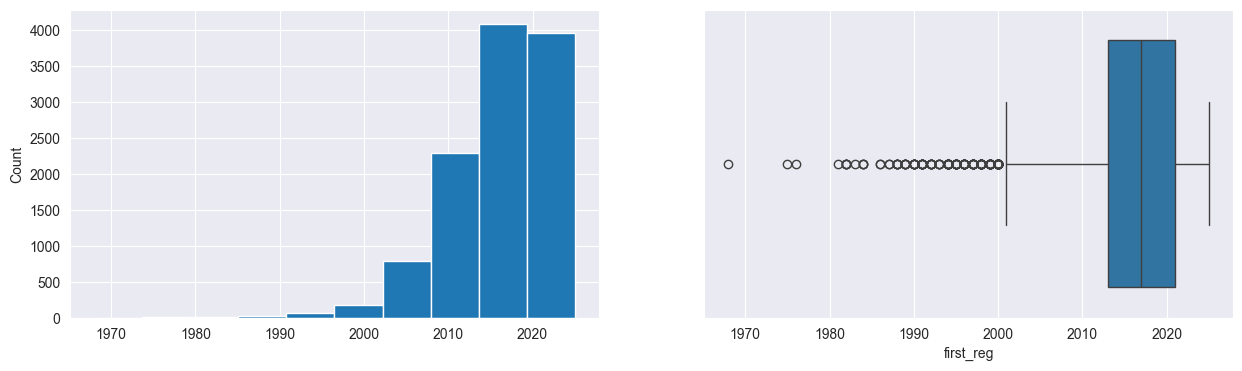

mileage
Skew value: -3.8


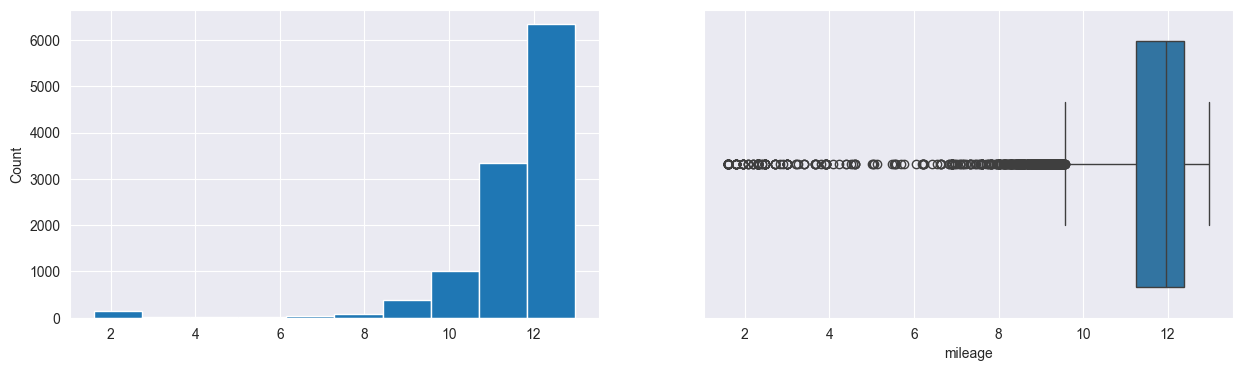

price
Skew value: -0.44


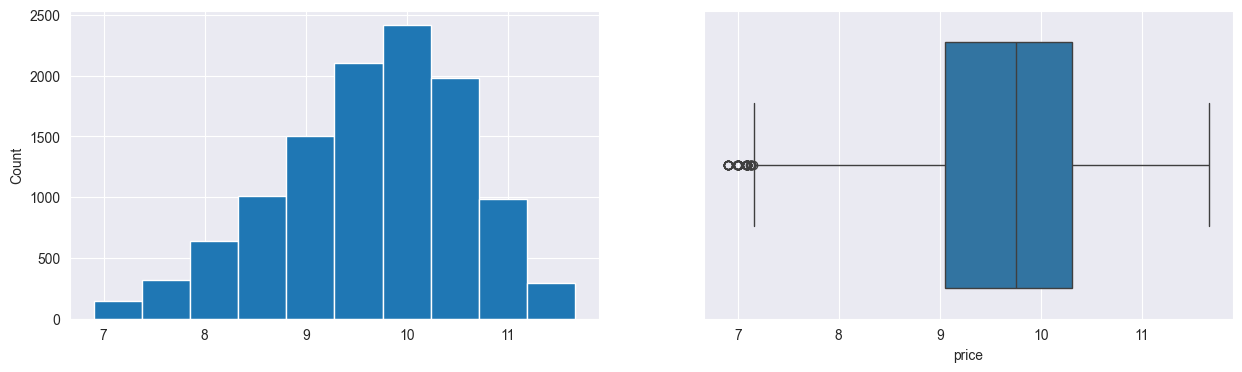

engine_size
Skew value: 3.81


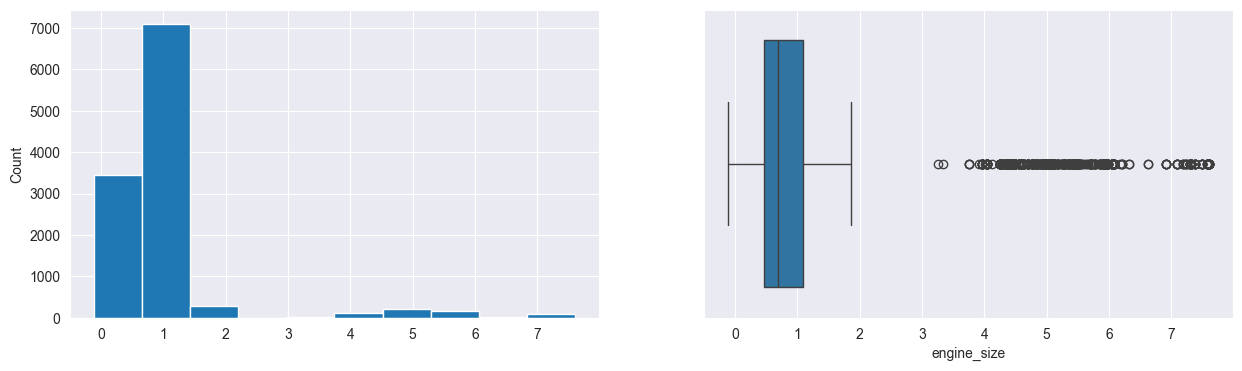

power
Skew value: 0.41


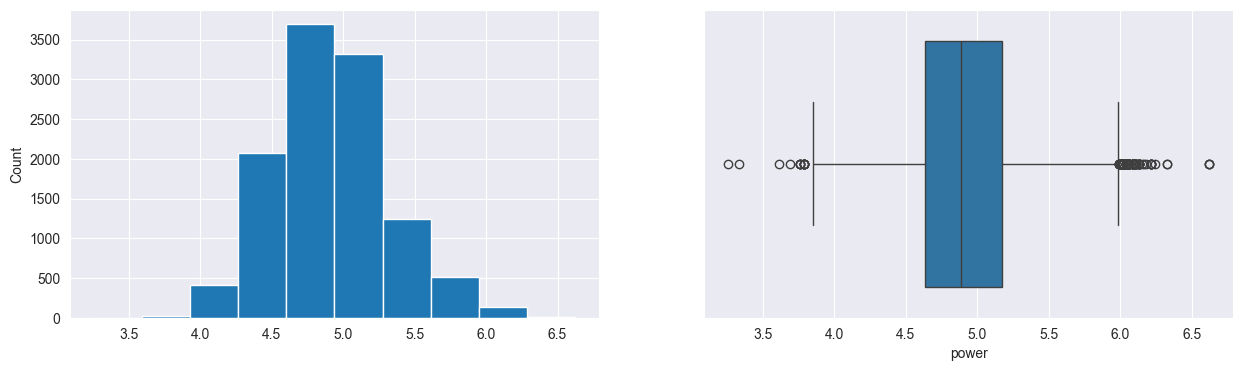

model_group
Skew value: 0.03


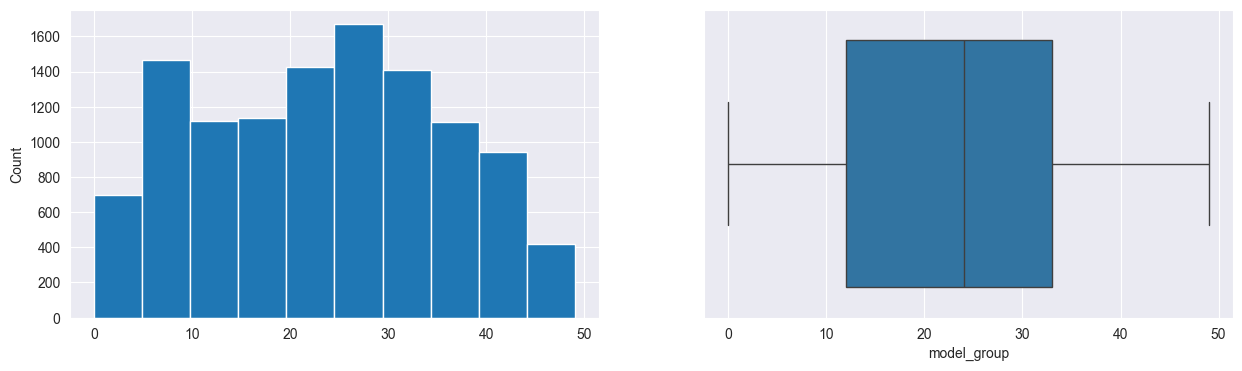

age
Skew value: -0.71


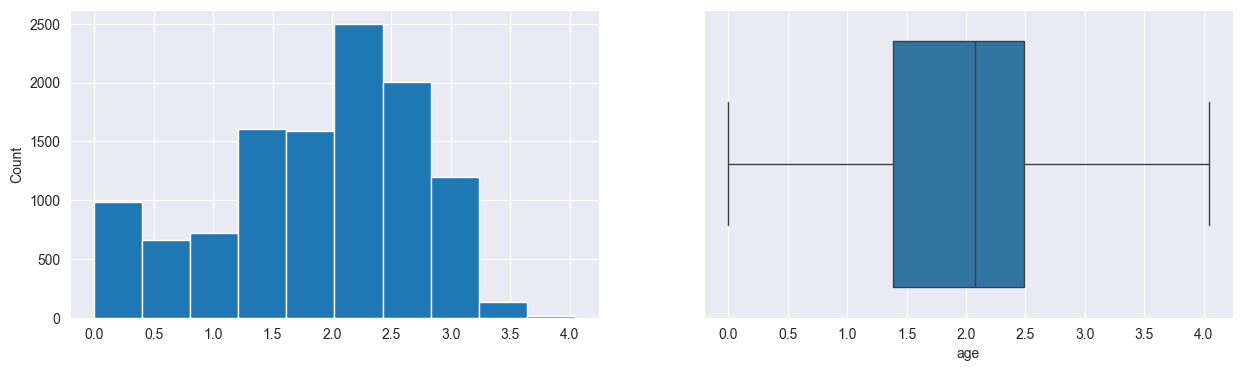

power_per_engine
Skew value: -0.07


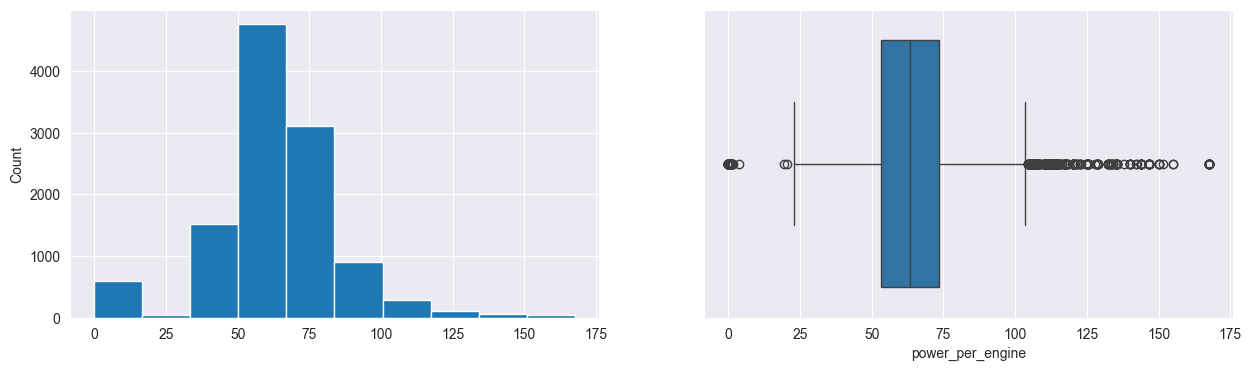

age_mileage_interaction
Skew value: -3.12


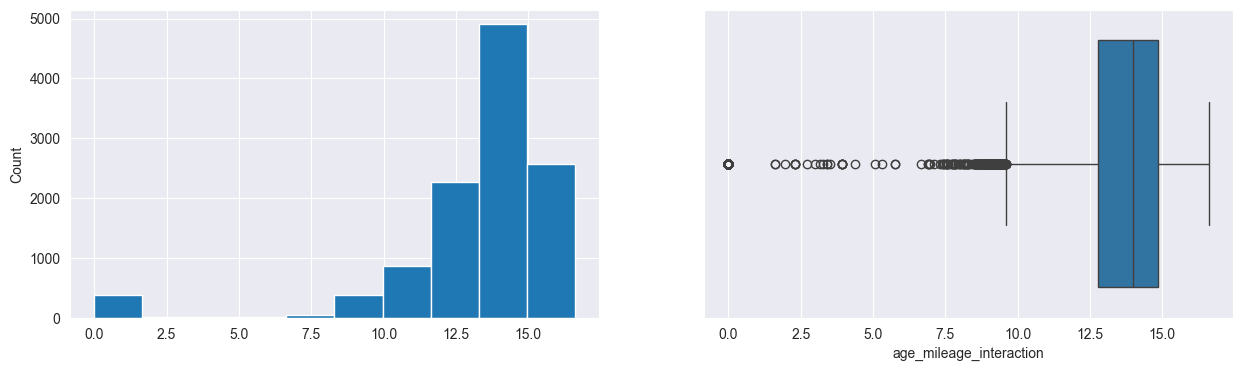

mileage_per_year
Skew value: -4.55


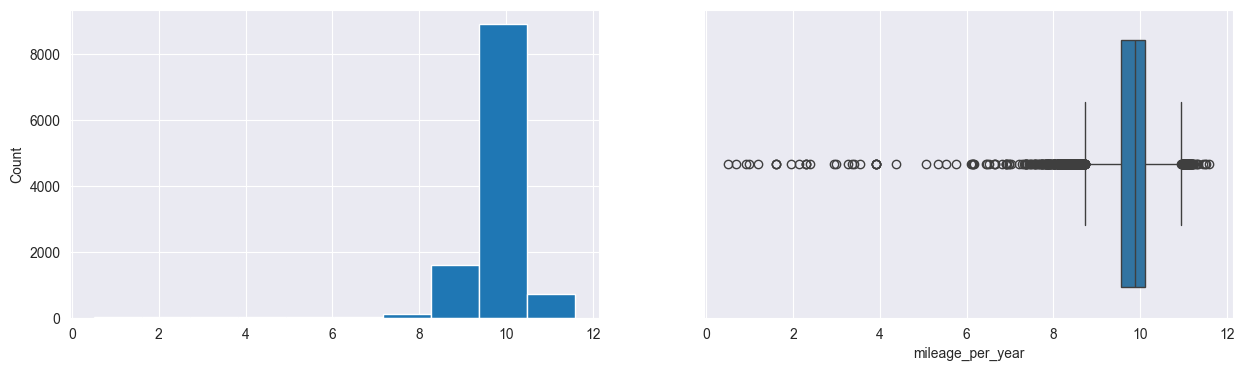

In [300]:
# Plotting num cols distributions again after log transformation. We see that there is lot less skewness now and columns are more balanced
for col in num_cols:
    print(col)
    print('Skew value:', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

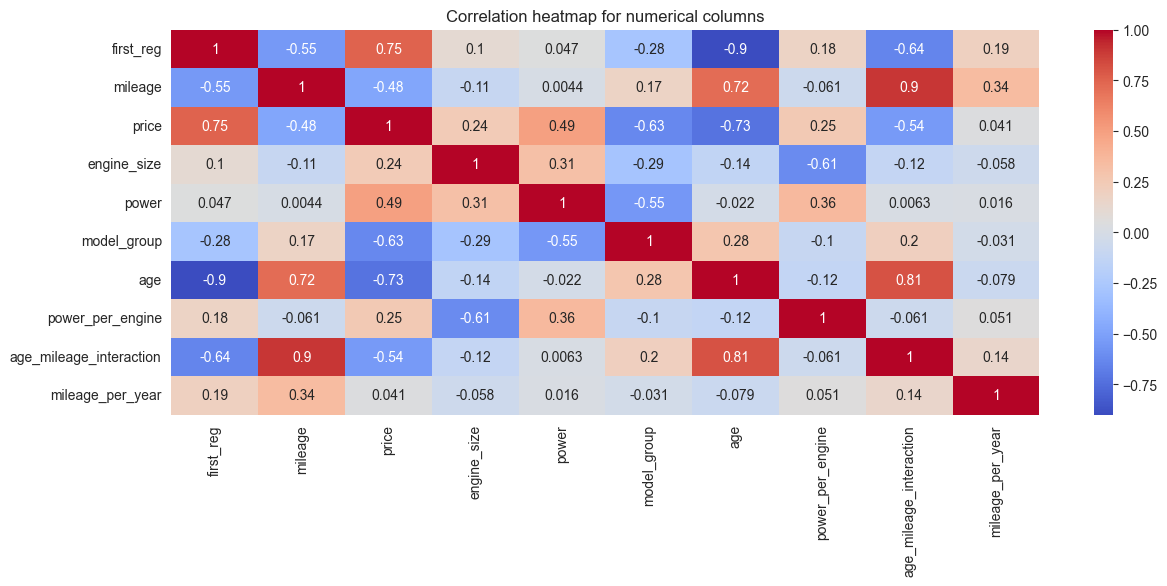

In [301]:
plt.figure(figsize=(14,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation heatmap for numerical columns")
plt.show()

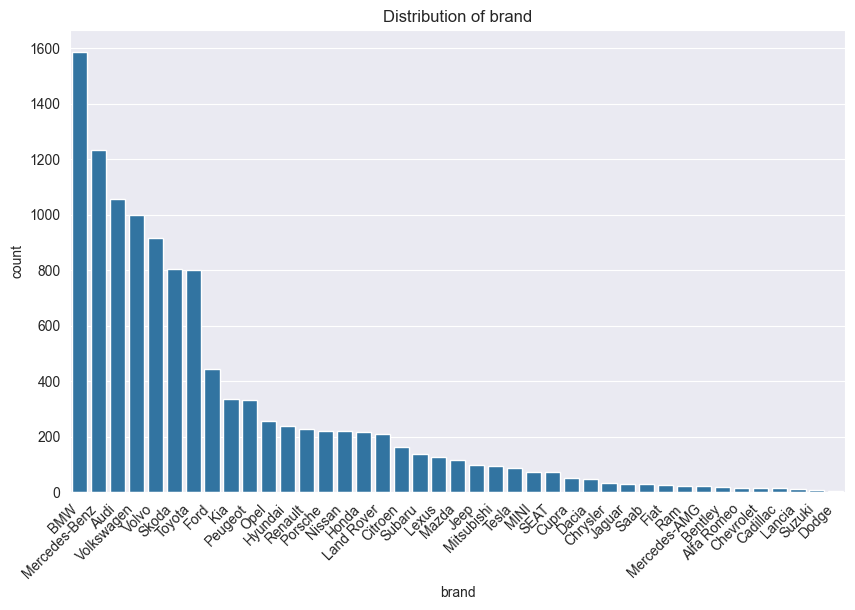

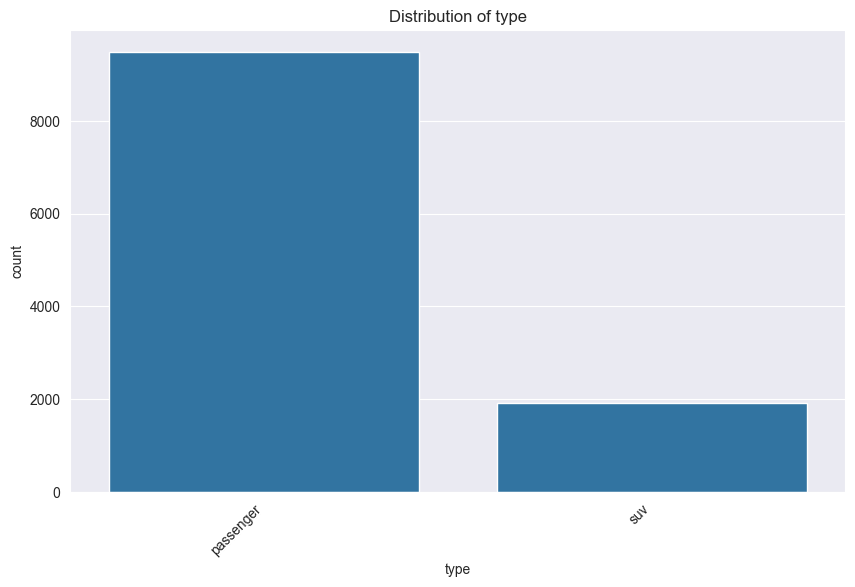

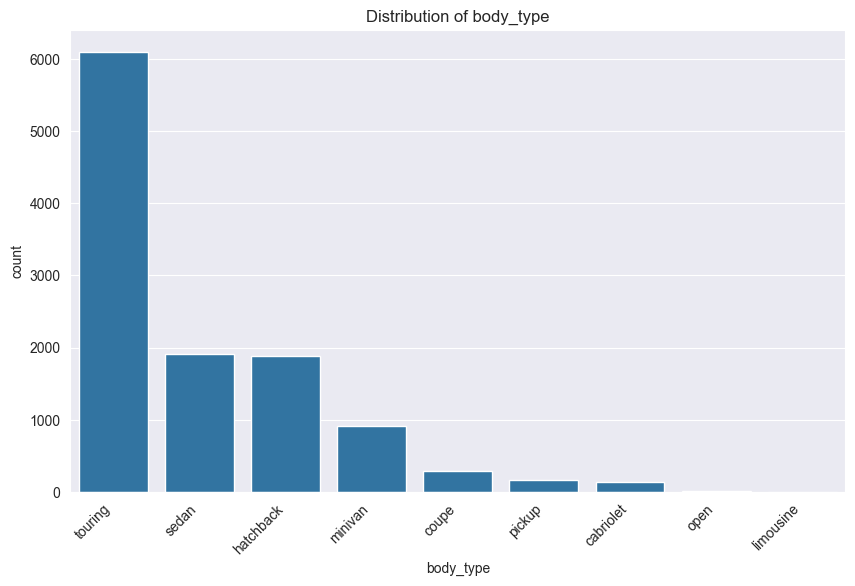

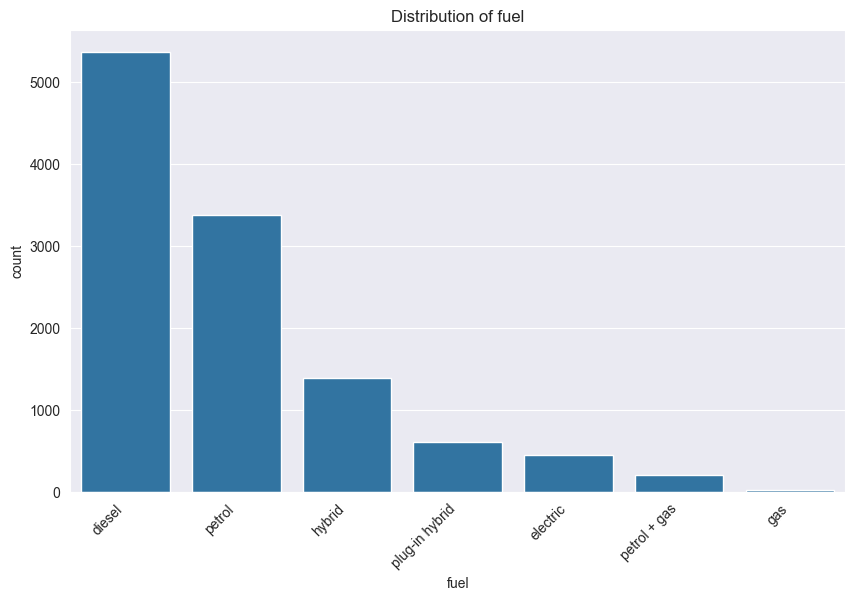

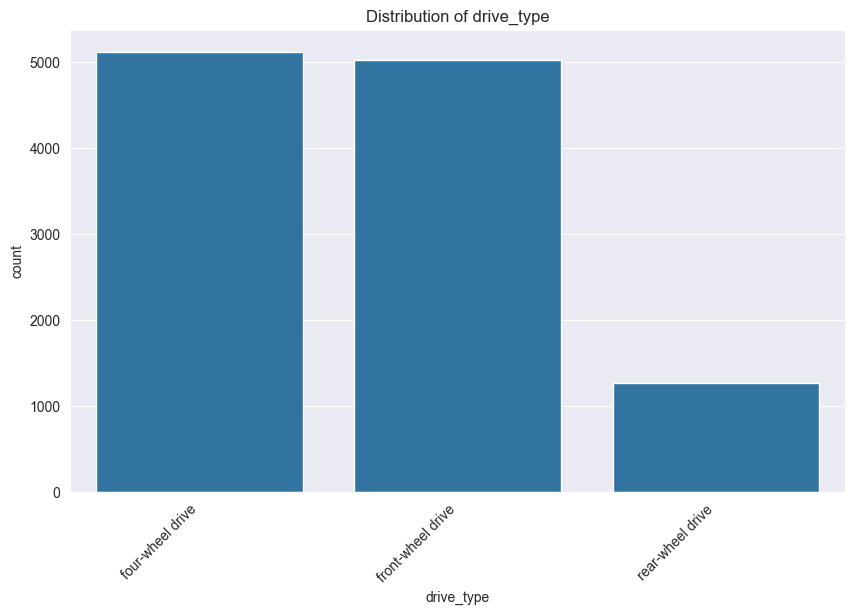

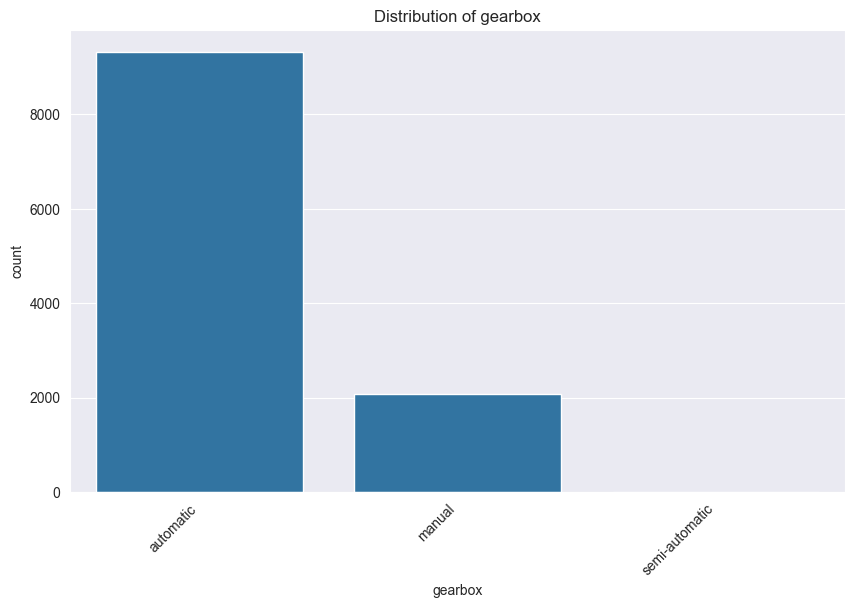

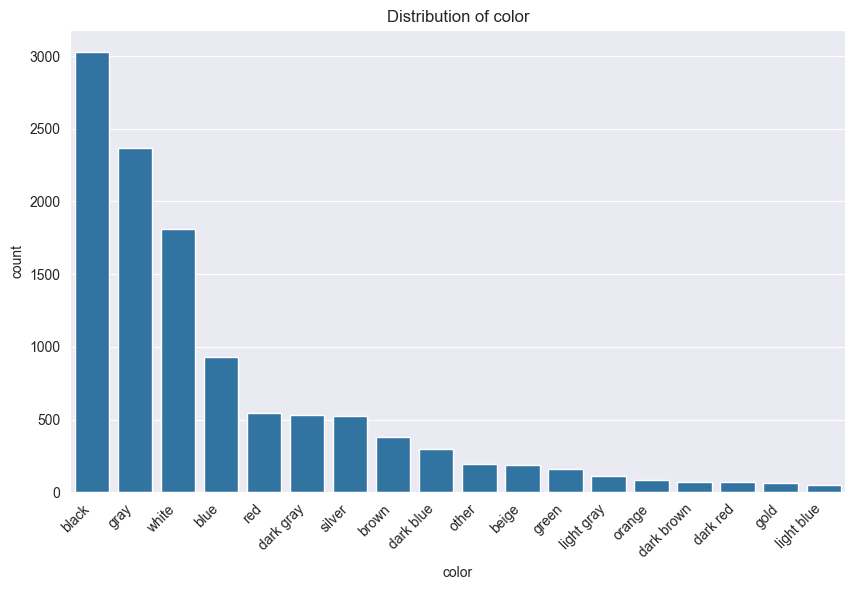

In [302]:
for feature in cat_cols:
    if feature != 'url':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

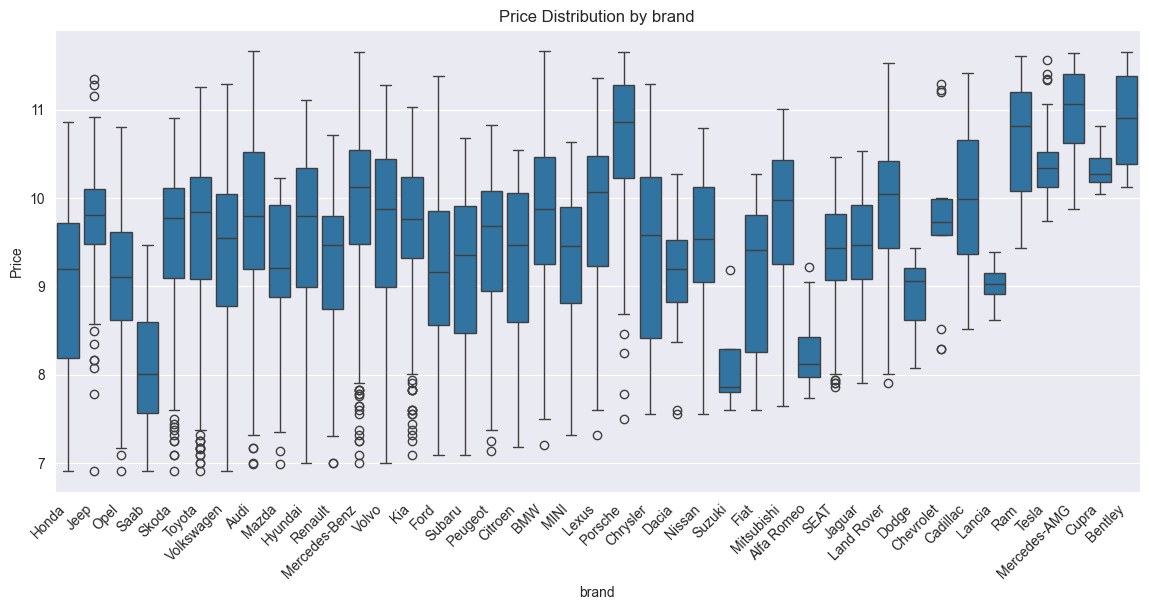

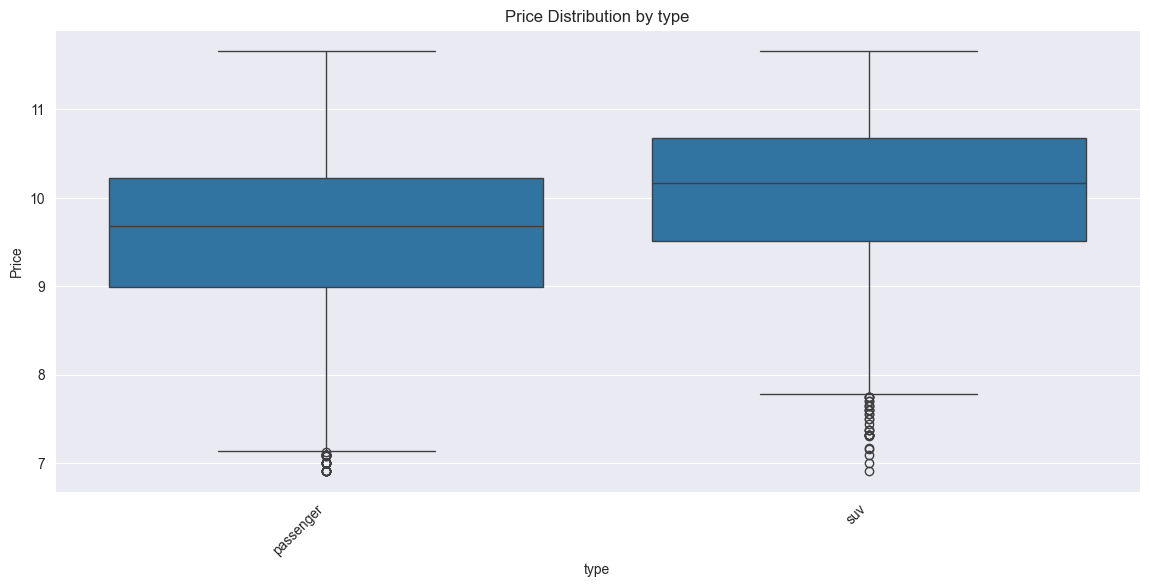

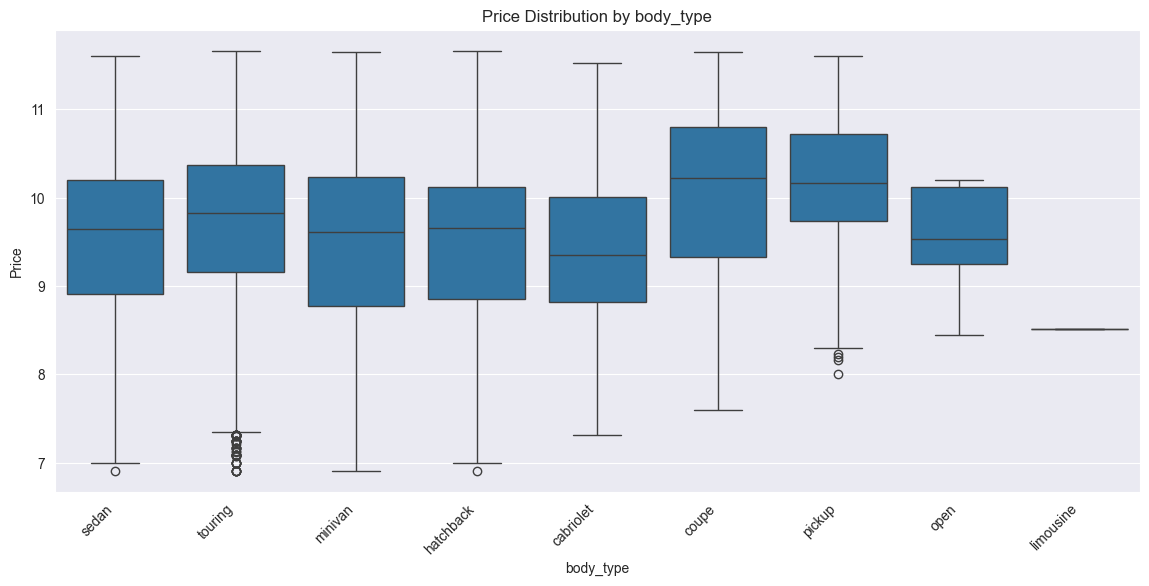

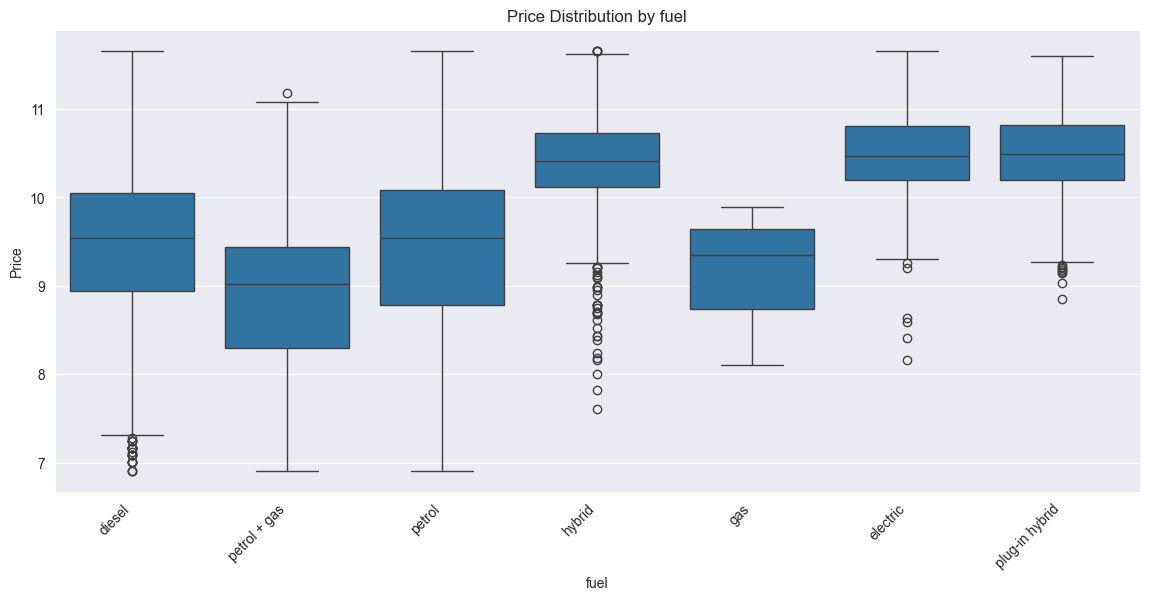

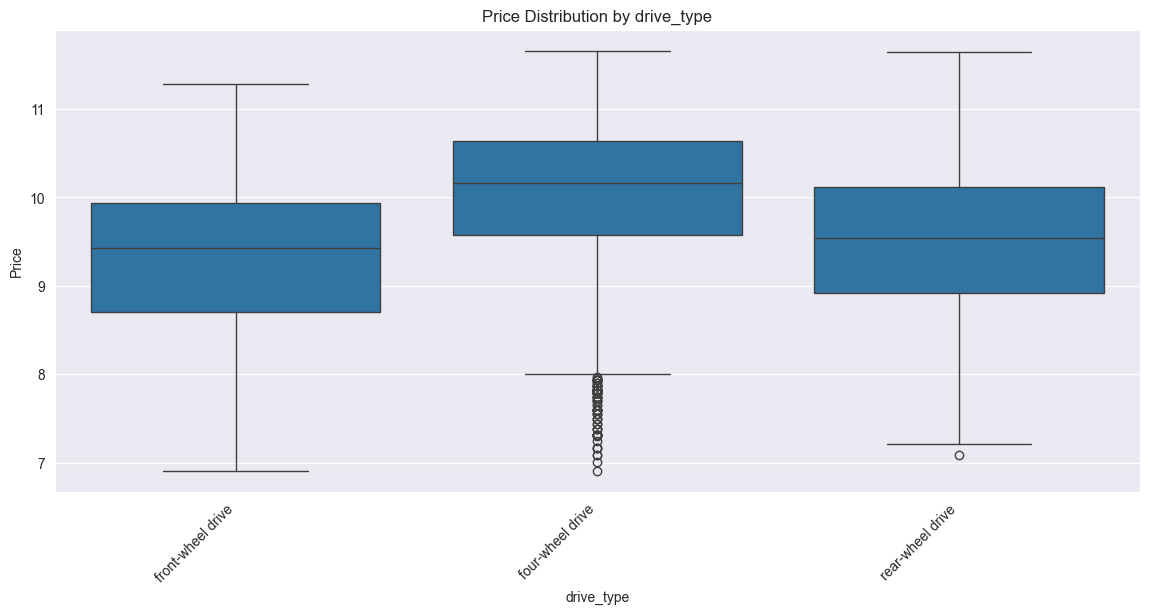

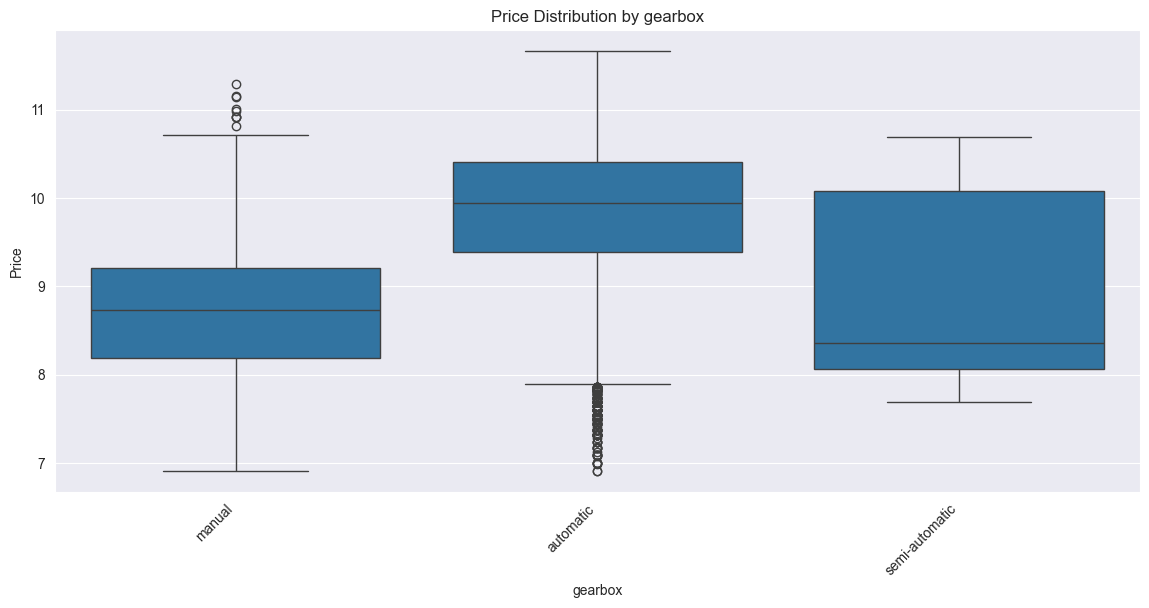

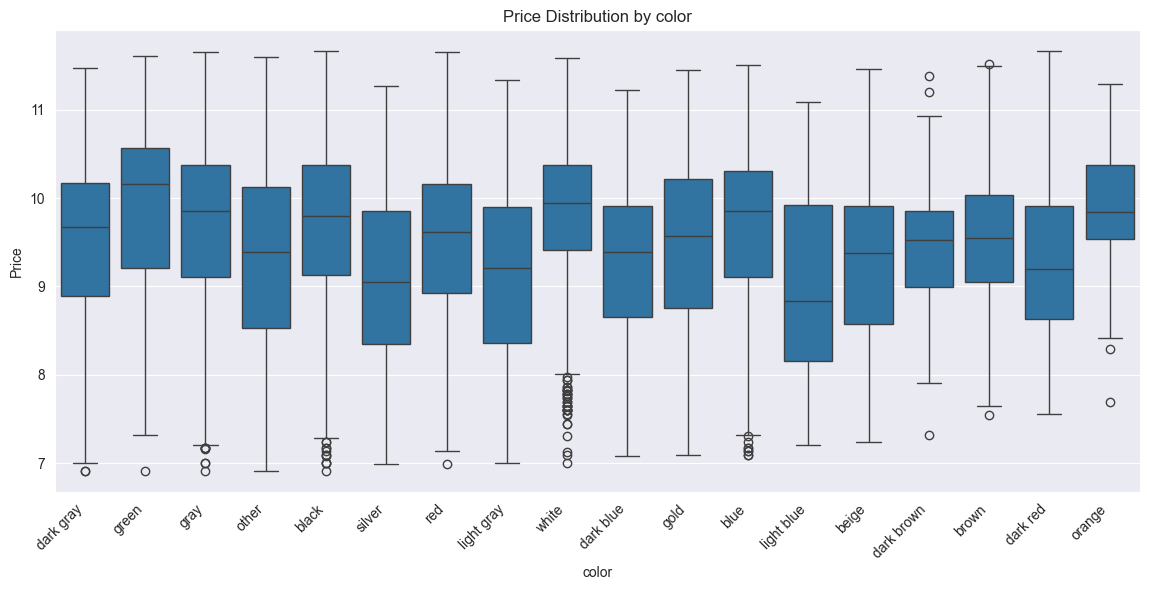

In [303]:
for feature in cat_cols:
    if feature != 'url':
        plt.figure(figsize=(14, 6))
        sns.boxplot(data=df, x=feature, y='price')

        plt.title(f'Price Distribution by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [304]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# --- 3. Save url column before processing ---
url_column = df['url'].copy()

# --- 4. Separate target and features ---
y = df['price']
X = df.drop(columns=['price', 'url'])  # Drop both price and url

# --- 5. Identify categorical and numeric columns ---
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# --- 6. Scale numeric columns ---
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Invert mileage scale (so low mileage = 1, high mileage = 0)
if 'mileage' in X.columns:
    X['mileage'] = 1 - X['mileage']

# --- 7. One-hot encode categorical columns ---
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- 8. Add url column back ---
X['url'] = url_column.values

In [305]:
# Save processed data to CSV
processed_df = X.copy()
processed_df['price'] = y
processed_df.to_csv('auto24_cars_clean.csv', index=False)
print(f"Processed data saved to auto24_cars_clean.csv")
print(f"Shape: {processed_df.shape}")

Processed data saved to auto24_cars_clean.csv
Shape: (11403, 87)
